In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [2]:
with open('../../output/weights/p_date=2022-09-03-13_55_50/log.json', 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

11001 records
dict_keys(['loss', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [3]:
# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-50_000:]
mean_loss = stat.mean(loss)
loss_filtered = { k: v for k, v in enumerate(loss) }#if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-50_000:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ]#[-500:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"]) if str(v) != "nan" }

In [4]:
def plot(data, title, labelX, labelY):
    interval = 1000
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : stat.mean(list(data.values())[i:i+interval+1]) for i in range(0, len(data.values()), interval) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Moving Average (simple): {moving_average}")
    print(f"Moving Average: {percent_list}")
   
    print(f"Minimum: {min(data.values())}")

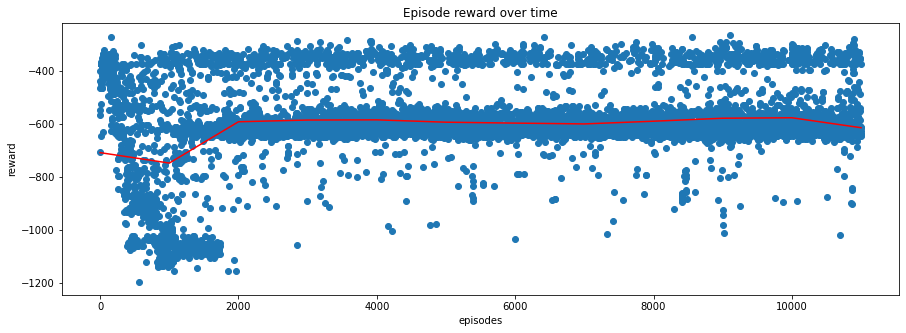

Maximum: -265.6
Average: -614.1910917189318
Moving Average (simple): {0: -708.8401598401598, 1000: -748.2571428571429, 2000: -592.1320679320679, 3000: -585.6531468531468, 4000: -584.9186813186814, 5000: -593.7858141858142, 6000: -597.237962037962, 7000: -600.2877122877123, 8000: -590.0673326673327, 9000: -578.7982017982018, 10000: -577.0091908091908, 11000: -614.6}
Moving Average: []
Minimum: -1199.4


In [5]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

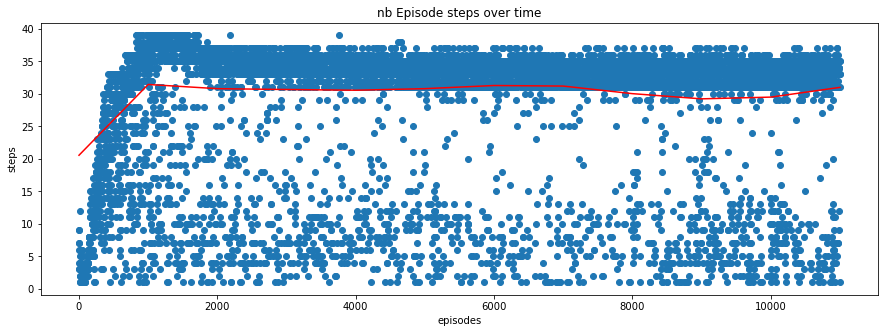

Maximum: 39
Average: 29.64230524497773
Moving Average (simple): {0: 20.560439560439562, 1000: 31.447552447552447, 2000: 30.802197802197803, 3000: 30.672327672327672, 4000: 30.56143856143856, 5000: 30.803196803196805, 6000: 31.286713286713287, 7000: 31.2007992007992, 8000: 30.034965034965033, 9000: 29.234765234765234, 10000: 29.5024975024975, 11000: 31}
Moving Average: ['+52% (31.447552447552447 | 52%)', '-2% (30.802197802197803 | 49%)', '0% (30.672327672327672 | 49%)', '0% (30.56143856143856 | 48%)', '+0% (30.803196803196805 | 49%)', '+1% (31.286713286713287 | 52%)', '0% (31.2007992007992 | 51%)', '-3% (30.034965034965033 | 46%)', '-2% (29.234765234765234 | 42%)', '+0% (29.5024975024975 | 43%)', '+5% (31.0 | 50%)']
Minimum: 1


In [6]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

In [7]:
# plot(loss_filtered, "Loss over time", "episodes", "loss")

In [8]:
#plot(mae_filtered, "Mae over time", "episodes", "mae")

In [9]:
#plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

In [10]:
#plot(duration, "Duration over time", "episodes", "duration")

In [11]:
#plot(accuracy, "accuracy over time", "accuracy", "steps")